In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
from db.conexion import get_connection

conn = get_connection()

query = """
SELECT 
    t.id, t.tipo, t.monto, t.fecha,
    co.numero_cuenta AS origen,
    cd.numero_cuenta AS destino
FROM transacciones t
LEFT JOIN cuentas co ON t.cuenta_origen_id = co.id
LEFT JOIN cuentas cd ON t.cuenta_destino_id = cd.id
"""

df = pd.read_sql(query, conn)
conn.close()

df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6648\1149055161.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,tipo,monto,fecha,origen,destino
0,1,Extracción,2000.0,2025-05-05 13:19:45,0001-000001,None
1,2,Transferencia,1000.0,2025-05-05 13:22:55,0001-000001,0001-000002
2,3,Extracción,500.0,2025-05-05 13:25:39,0001-000001,None
3,4,Transferencia,300.0,2025-05-05 18:44:12,0001-000001,0001-000002


In [3]:
#VERIFICAR TIPOS DE DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       4 non-null      int64         
 1   tipo     4 non-null      object        
 2   monto    4 non-null      float64       
 3   fecha    4 non-null      datetime64[ns]
 4   origen   4 non-null      object        
 5   destino  2 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 324.0+ bytes


In [4]:
#Estadísticas rápidas
df.describe()

,id,monto,fecha
count,4.000000,4.000000,4
mean,2.500000,950.000000,2025-05-05 14:43:07.750000128
min,1.000000,300.000000,2025-05-05 13:19:45
25%,1.750000,450.000000,2025-05-05 13:22:07.500000
50%,2.500000,750.000000,2025-05-05 13:24:17
75%,3.250000,1250.000000,2025-05-05 14:45:17.249999872
max,4.000000,2000.000000,2025-05-05 18:44:12
std,1.290994,759.385717,NaN


In [5]:
#¿Cuántas transacciones por tipo?
df['tipo'].value_counts()

tipo
Extracción       2
Transferencia    2
Name: count, dtype: int64

In [6]:
#¿Qué cuenta movió más dinero?
df.groupby('origen')['monto'].sum().sort_values(ascending=False).head(5)


origen
0001-000001    3800.0
Name: monto, dtype: float64

In [7]:
# ¿Cuánto se movió por tipo de transacción?
df.groupby('tipo')['monto'].sum()

tipo
Extracción       2500.0
Transferencia    1300.0
Name: monto, dtype: float64

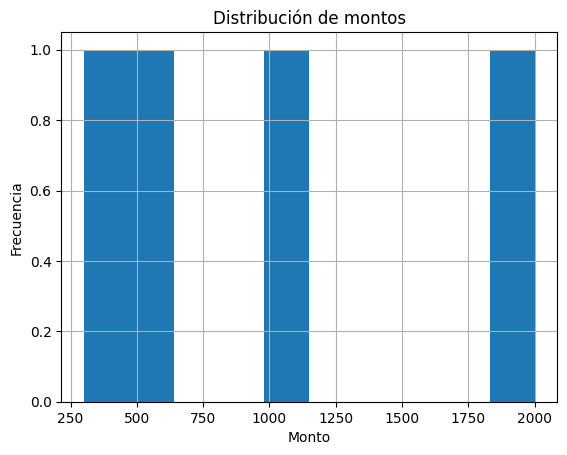

In [7]:
#Histograma de montos
import matplotlib.pyplot as plt

df['monto'].hist(bins=10)
plt.title("Distribución de montos")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()